# **Title: Heart Disease Prediction**
`Author:` ["Tehreem Qayyum"]() \
`Data:` 27-08-2024
\
`Dataset:` ["Heart Disease"](https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci)


# **Meta-Data (About Dataset)**
## **Context:**
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## **Content**
Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type
* `typical` angina,
* `atypical` angina,
* `non-anginal`,
* `asymptomatic`
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:` [normal; fixed defect; reversible defect]
* `num:` the predicted attribute
# **Acknowledgements**
## **Creators:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
## **Relevant Papers:**
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### **Citation Request:**
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

### **They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.


## **Aims and Objective:**
We will fill this after doing some exploratory Data Analyis (EDA).


## **Import Libraries**
Let's start the project by impoprting all the libraries that we will need in this project.

In [49]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. to visulaize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

# to preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Load the dataset**

In [50]:
# load the data from csv file 
df = pd.read_csv('heart_disease_uci.csv')

# print the first five rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## **Exploratory Data Analysis**

### **Explore each column**

In [51]:
# exploring the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [52]:
# data shape
df.shape

(920, 16)

In [53]:
# age column
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

<Axes: xlabel='age', ylabel='Density'>

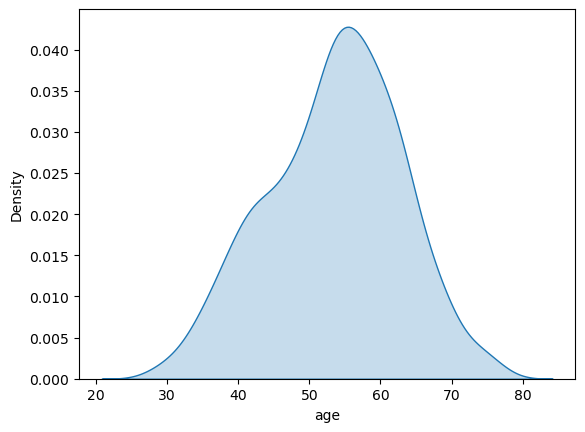

In [54]:
# plot the age column
sns.kdeplot(df['age'], shade=True)

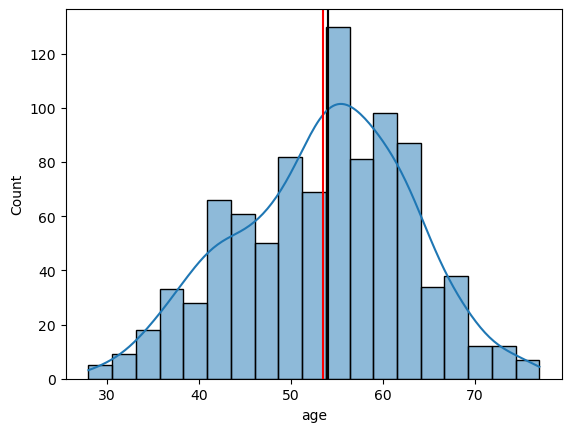

--------------------------------------------
Mean:  53.51086956521739
Median:  54.0
Mode:  54


In [55]:
# plot the mean, median and mode of the age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color = 'red')
plt.axvline(df['age'].median(), color = 'green')
plt.axvline(df['age'].mode()[0], color = 'black')
plt.show()

# printing the value of mean, median and mode
print('--------------------------------------------')
print('Mean: ', df['age'].mean())
print('Median: ', df['age'].median())
print('Mode: ', df['age'].mode()[0])

In [56]:
# plot the hidtogram of age column using plotly and coloring this by sex
fig = px.histogram(df, x='age', color='sex')
fig.show()

In [57]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [58]:
# calculate the percentage's of male and female counts 
df['sex'].value_counts(normalize=True)

sex
Male      0.78913
Female    0.21087
Name: proportion, dtype: float64

In [59]:
# how much more are the male from female 
df['sex'].value_counts(normalize=True).diff()

sex
Male           NaN
Female   -0.578261
Name: proportion, dtype: float64

In [60]:
# find the value count of age column by grouping by sex column
df['age'].groupby(df['sex']).value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [61]:
# let's deal with dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [62]:
# check the values count of dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [63]:
# barplot using plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [64]:
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [65]:
# make a plot of age column and coloring by dataset column 
fig = px.histogram(df, x='age', color='dataset')
fig.show()


In [66]:
# printing mean, median, mode of age column groupby dataset column
print(df.groupby('dataset')['age'].mean())
print(df.groupby('dataset')['age'].median())
print(df.groupby('dataset')['age'].agg(pd.Series.mode))

dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


### **let's explore cp(chest pain) column** 

In [67]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

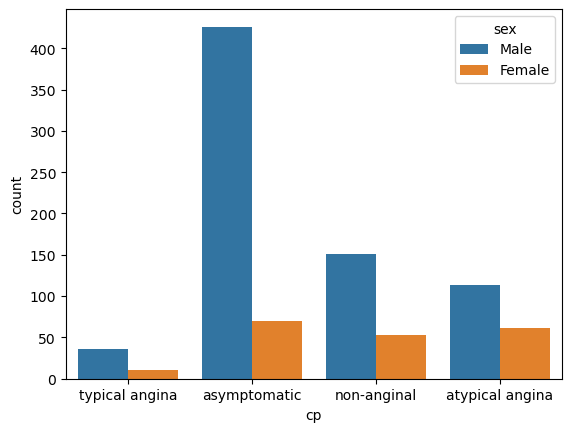

In [68]:
# count plot of cp column by sex column
sns.countplot(df , x= 'cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

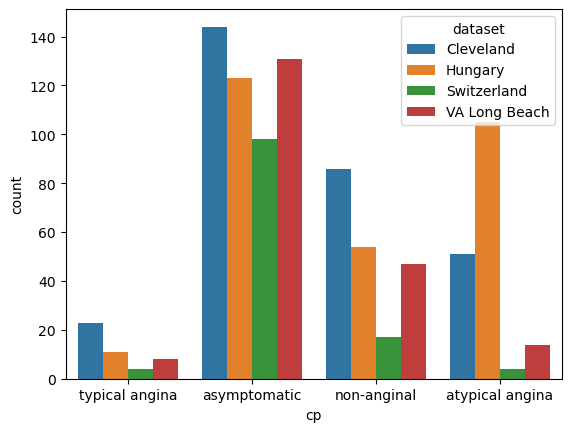

In [69]:
# count plot of cp column by dataset column
sns.countplot(df , x= 'cp', hue='dataset')

In [70]:
# draw the plot of age column groupby cp column
fig = px.histogram(df, x='age', color='cp')
fig.show()

### **let's explore the trestbps(resting blood pressure) column**
Normal bloos pressure is 120/80 mm Hg

`wrtie here what will happen if the blood pressure is hogh or low and then you can bin`

In [71]:
# summary of tresbps
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

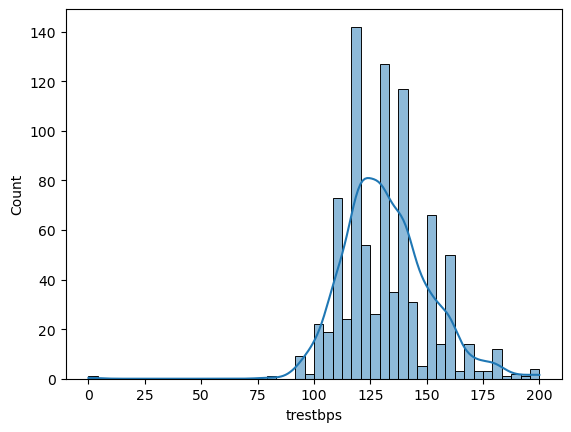

In [72]:
# create a histplot of trestbps column
sns.histplot(df, x='trestbps', kde=True)

In [73]:
# percentage of missing values in trestbps column
df['trestbps'].isna().sum()/len(df['trestbps']) * 100

np.float64(6.41304347826087)

In [74]:
# impute the missing value using iterative imputer

imputer = IterativeImputer(max_iter = 10 , random_state=42)

df['trestbps'] = imputer.fit_transform(df[['trestbps']])

df['trestbps'].isna().sum()


np.int64(0)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [76]:
# impute missing values using IterativeImputer for columns ca, oldpeak. thalch, chol

imputer = IterativeImputer(max_iter = 10 , random_state=42)
# fit transform the imputer ca, oldpeak. thalch, chol
df[['ca', 'oldpeak', 'thalch', 'chol']] = imputer.fit_transform(df[['ca', 'oldpeak', 'thalch', 'chol']])
# checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [77]:
# let's impute other columns with missing values
df.isnull().sum().sort_values(ascending=False)


thal        486
slope       309
fbs          90
exang        55
restecg       2
id            0
sex           0
age           0
chol          0
trestbps      0
cp            0
dataset       0
oldpeak       0
thalch        0
ca            0
num           0
dtype: int64

### **let's impute missing value in thal column using ML model**

In [78]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [79]:
print('The missing values in thal column are: ',df['thal'].isnull().sum())

The missing values in thal column are:  486


## **output**
1. The minmum age where the heart disease start is 28 years 
2. Most of the people hae heart disease at the age of 53-54 age.
3. Most of the male and female have heart disease is at the age of 54-55 years.
4. Most of the heart disease problem arises in male:
   1. Male      0.78913
   2. Female    0.21087
5. we have highest number of people from Cleveland (304) and lowest fro Switzerland (123)
   1. The highest number of female in this dataset are belongs to Cleveland (97)and lowest from VA Long Beach(6)
   2. The highest number of male in this dataset are belongs to Hungary(212) and lowest from Switzerland(113)
6. There is difference between the mean, median and mode of the age column groupby by the dataset column, here the details of Mean:
   1. Cleveland        54.351974
   2. Hungary          47.894198
   3. Switzerland      55.317073
   4. VA Long Beach    59.350000
7. Median:
   1. Cleveland        55.5
   2. Hungary          49.0
   3. Switzerland      56.0
   4. VA Long Beach    60.0
8. Mode:
   1. Cleveland              58
   2. Hungary                54
   3. Switzerland            61
   4. VA Long Beach    [62, 63]
9. `write down cp column here`